<a href="https://colab.research.google.com/github/rama811/tp_aa1/blob/main/TP1_AA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importación de librerías

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor, RidgeCV, ElasticNetCV, LassoCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [3]:
file_path= '/content/drive/MyDrive/weatherAUS.csv'
df = pd.read_csv(file_path, sep=',',engine='python')

# Transformación y limpieza de los datos

In [4]:
df.head()

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
0,0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,0.0
1,1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,0.0
2,2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,0.0
3,3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,1.0
4,4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,0.2


In [5]:
#Eliminamos la primer columna ya que solo representa una clave del registro

df.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
#Filtramos el DataFrame para incluir solo las ciudades de la costa sureste

ciudades_a_filtrar = ['Sydney', 'SydneyAirport', 'Canberra', 'Melbourne', 'MelbourneAirport']
df = df[df['Location'].isin(ciudades_a_filtrar)]

In [7]:
#Eliminamos los registros vacíos en las columnas a predecir

columnas_a_borrar = ['RainToday', 'RainTomorrow', 'RainfallTomorrow']
df = df.dropna(subset=columnas_a_borrar)

In [8]:
#Verificamos de que tipo es cada variable y la cantidad de datos nulos que posee

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15036 entries, 30167 to 70370
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              15036 non-null  object 
 1   Location          15036 non-null  object 
 2   MinTemp           15028 non-null  float64
 3   MaxTemp           15031 non-null  float64
 4   Rainfall          15036 non-null  float64
 5   Evaporation       13355 non-null  float64
 6   Sunshine          13105 non-null  float64
 7   WindGustDir       13600 non-null  object 
 8   WindGustSpeed     13602 non-null  float64
 9   WindDir9am        14364 non-null  object 
 10  WindDir3pm        14748 non-null  object 
 11  WindSpeed9am      14776 non-null  float64
 12  WindSpeed3pm      14787 non-null  float64
 13  Humidity9am       14950 non-null  float64
 14  Humidity3pm       14993 non-null  float64
 15  Pressure9am       14784 non-null  float64
 16  Pressure3pm       14792 non-null  fl

In [9]:
#Creamos una copia del dataset antes de rellenar los valores faltantes

df_copia = df.copy()

In [10]:
#Rellenamos los valores faltantes con la media en las columnas numéricas

medias = df.mean()
df = df.fillna(medias)

<ipython-input-10-d11d403f6219>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  medias = df.mean()


In [11]:
#Rellenamos los valores faltantes con la moda en las columnas no numéricas

modas = df.mode().iloc[0]
df = df.fillna(modas)

In [12]:
#Chequeamos la cantidad de valores faltantes

df.isna().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday           0
RainTomorrow        0
RainfallTomorrow    0
dtype: int64

# Análisis exploratorio de los datos

In [13]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainfallTomorrow
count,15036.000000,15036.000000,15036.000000,15036.000000,15036.000000,15036.000000,15036.000000,15036.000000,15036.000000,15036.000000,15036.000000,15036.000000,15036.000000,15036.000000,15036.000000,15036.000000,15036.000000
mean,11.612610,21.803739,2.299601,4.881041,6.907707,44.290619,16.443760,21.731589,68.876388,51.239645,1018.338400,1016.077778,4.737972,4.735349,15.588770,20.277899,2.250213
std,5.884769,6.057217,7.404618,2.880134,3.582365,14.217528,10.175642,9.446496,15.608891,17.731617,7.338552,7.206061,2.552724,2.402256,5.568842,5.859242,7.318972
min,-8.000000,4.100000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,11.000000,3.000000,986.700000,985.500000,0.000000,0.000000,-1.300000,3.700000,0.000000
25%,7.900000,17.200000,0.000000,2.800000,4.500000,35.000000,9.000000,15.000000,59.000000,39.000000,1013.600000,1011.300000,2.000000,3.000000,11.600000,16.000000,0.000000
50%,11.600000,21.300000,0.000000,4.800000,6.907707,44.000000,15.000000,20.000000,70.000000,51.000000,1018.338400,1016.100000,5.000000,5.000000,15.500000,19.900000,0.000000
75%,15.900000,25.800000,0.800000,6.400000,9.700000,52.000000,22.000000,28.000000,80.000000,62.000000,1023.200000,1020.900000,7.000000,7.000000,19.600000,24.200000,0.800000
max,30.500000,46.800000,119.400000,23.800000,13.900000,122.000000,69.000000,76.000000,100.000000,100.000000,1040.600000,1037.900000,9.000000,8.000000,37.200000,46.100000,119.400000


<ipython-input-14-0f7dff78ed1c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_corr = df.corr()


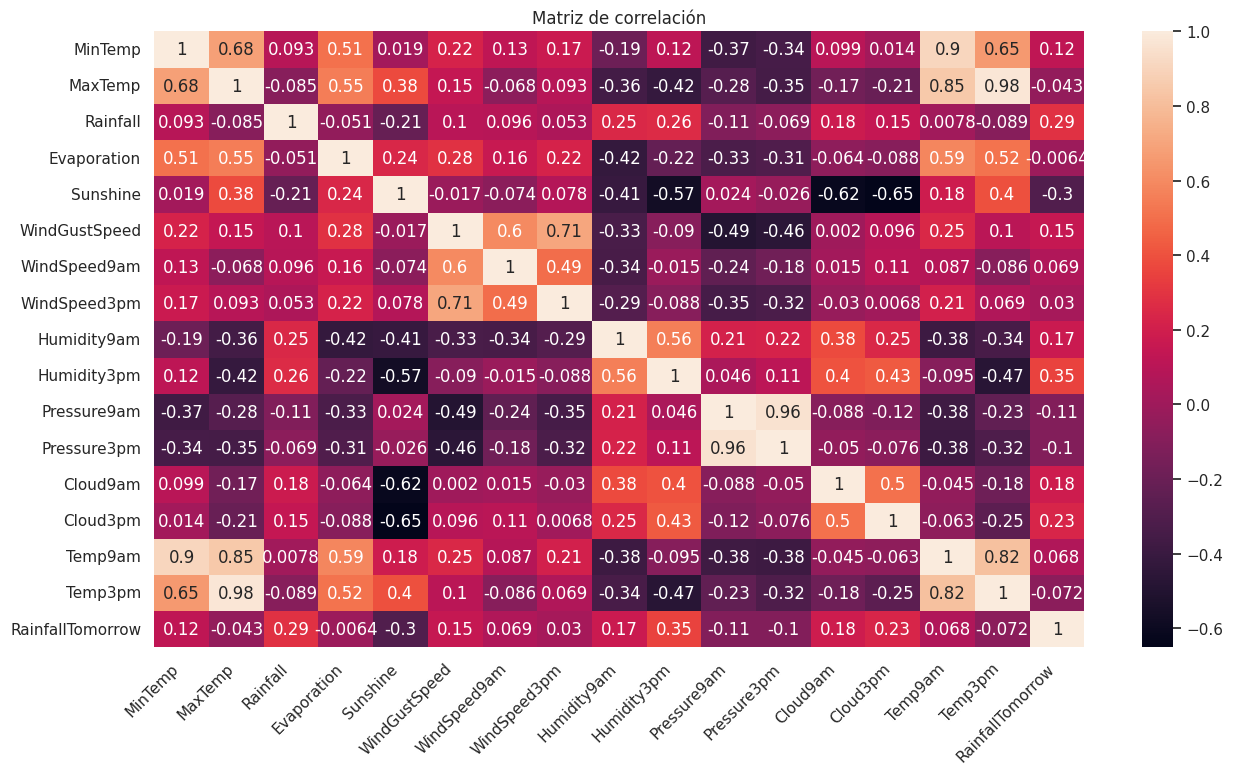

In [14]:
#Se realiza y se grafica la matriz de correlación para analizar las relaciones entre las variables

matriz_corr = df.corr()

sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(matriz_corr, annot=True)
plt.xticks(rotation=45, ha='right')
plt.title('Matriz de correlación')
plt.show()

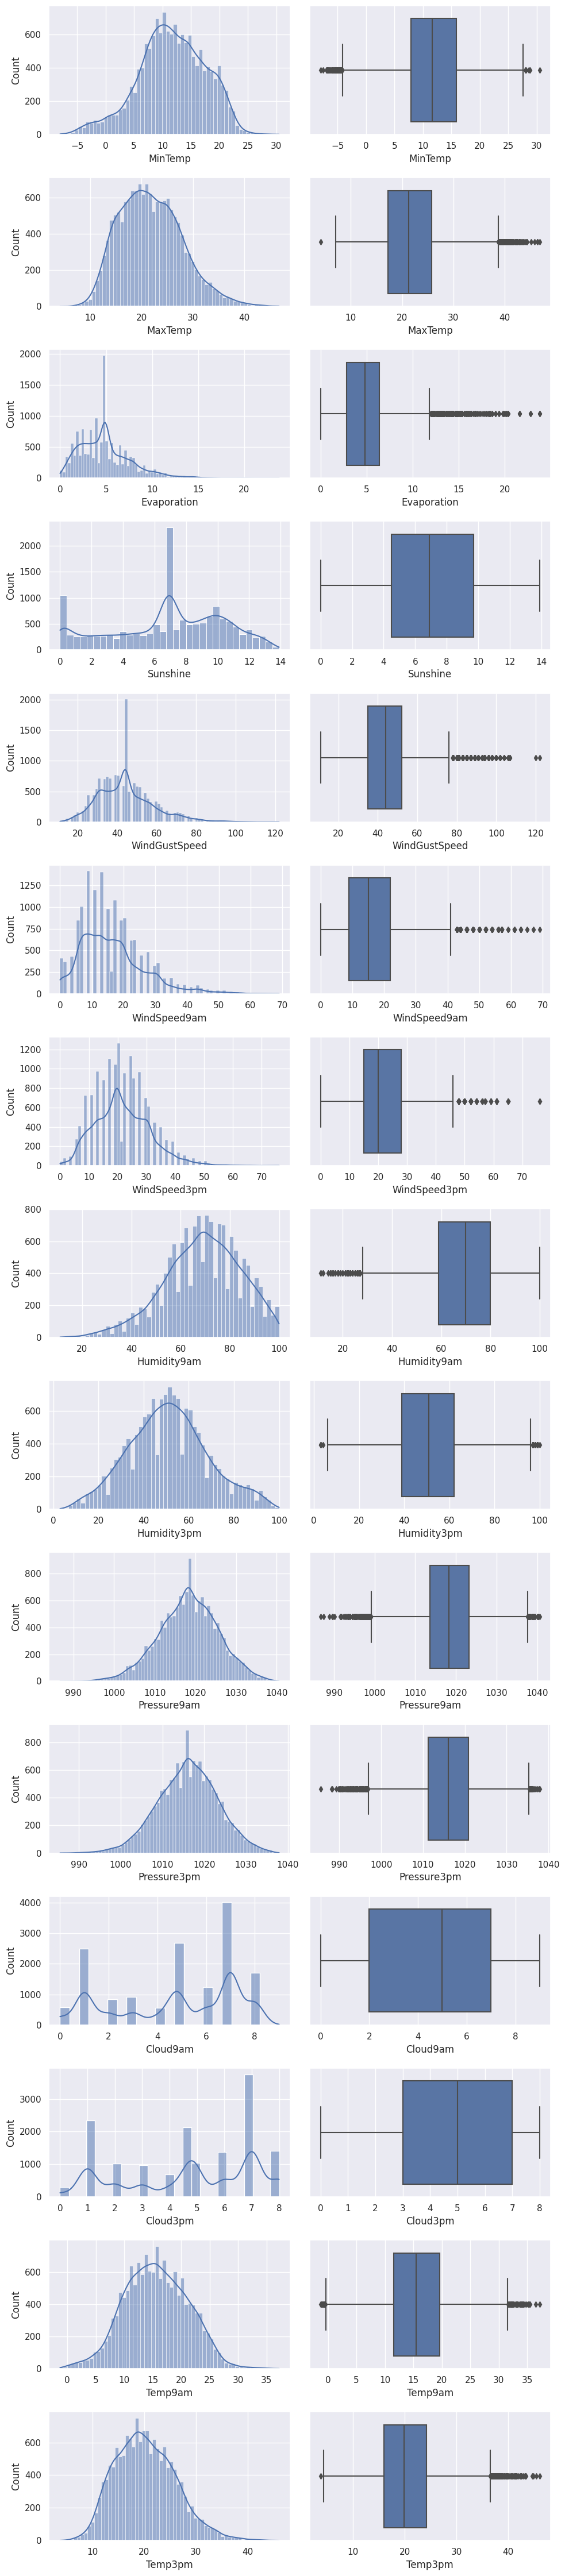

In [15]:
#Creamos histogramas y diagramas de cajas por cada variable numérica

columnas_numericas = df.select_dtypes(include=['number'])
columnas_a_eliminar = ['Rainfall', 'RainfallTomorrow']
columnas_numericas = columnas_numericas.drop(columns=columnas_a_eliminar)

fig, axes = plt.subplots(nrows=len(columnas_numericas.columns), ncols=2, figsize=(10, 3 * len(columnas_numericas.columns)))

for i, columna in enumerate(columnas_numericas.columns):
    sns.histplot(df[columna], ax=axes[i, 0], kde=True)
    sns.boxplot(data=df, x=columna, ax=axes[i, 1])

plt.tight_layout()
plt.show()

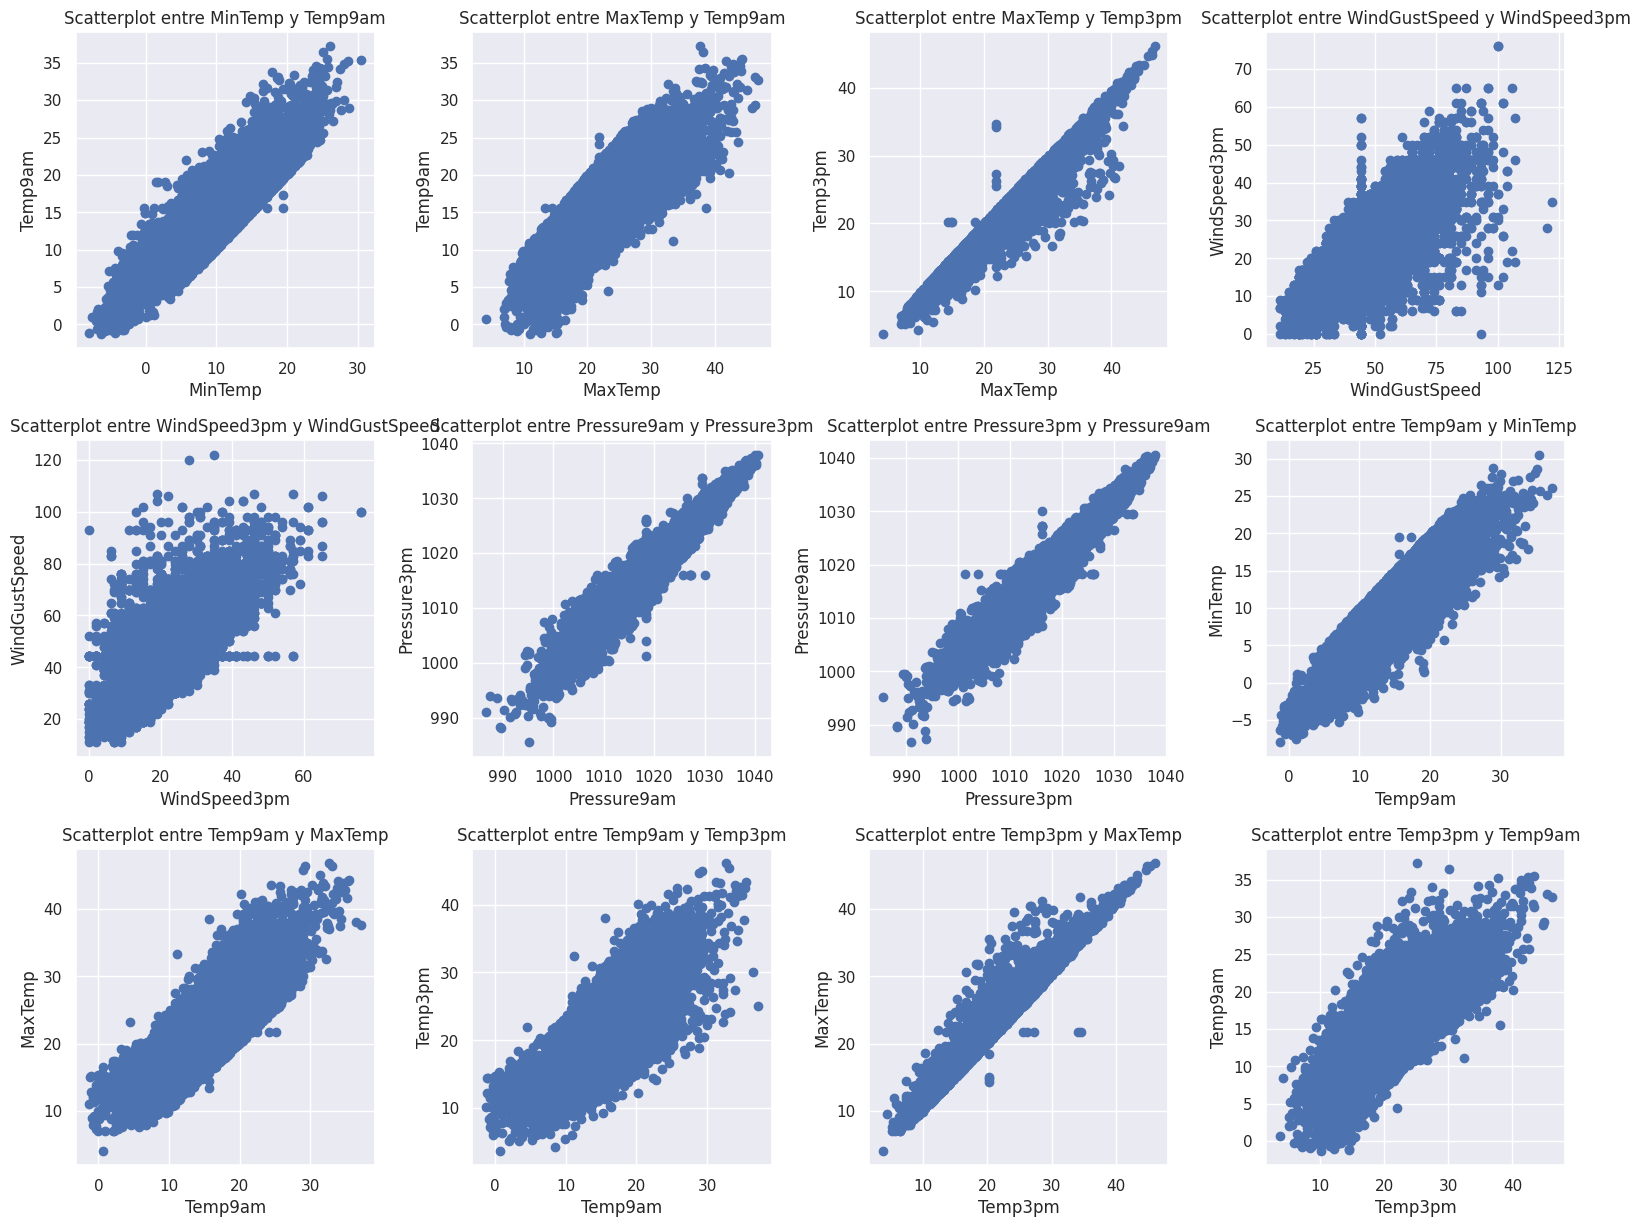

In [16]:
#Creamos scatterplots entre las variables más fuertemente relacionadas

mascara = (matriz_corr > 0.7) | (matriz_corr < -0.7)

variables_seleccionadas = []
for var1 in matriz_corr.columns:
    for var2 in matriz_corr.columns:
        if var1 != var2 and mascara.loc[var1, var2]:
            variables_seleccionadas.append((var1, var2))

graficos_por_fila = 4
num_filas = len(variables_seleccionadas) // graficos_por_fila + 1
plt.figure(figsize=(16, 4 * num_filas))

for i, (var1, var2) in enumerate(variables_seleccionadas):
    plt.subplot(num_filas, graficos_por_fila, i + 1)
    plt.scatter(df[var1], df[var2])
    plt.title(f'Scatterplot entre {var1} y {var2}')
    plt.xlabel(var1)
    plt.ylabel(var2)

plt.tight_layout()

plt.show()

# ¿Está balanceado el dataset?

In [17]:
#Calcular la frecuencia y la proporción de ejemplos en cada clase
conteo_clases = df['RainTomorrow'].value_counts()

proporcion_clases = conteo_clases / len(df)

print("Conteo de Clases:")
print(conteo_clases)
print("\nProporción de Clases:")
print(proporcion_clases)


Conteo de Clases:
No     11593
Yes     3443
Name: RainTomorrow, dtype: int64

Proporción de Clases:
No     0.771016
Yes    0.228984
Name: RainTomorrow, dtype: float64


Ya que la proporción de ambos valores es claramente muy dispar, se puede decir que el dataset no está balanceado.

# Codificación de variables categóricas

In [18]:
#Utilizamos la función get_dummies de Pandas para aplicar One-Hot Encoding a las variables categóricas
df_encoded = pd.get_dummies(df, columns=['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'], prefix=['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'])
df_encoded

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,...,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes,RainTomorrow_No,RainTomorrow_Yes
30167,2008-02-01,Sydney,19.5,22.4,15.6,6.200000,0.0,44.290619,17.0,20.0,...,0,1,0,0,0,0,0,1,0,1
30168,2008-02-02,Sydney,19.5,25.6,6.0,3.400000,2.7,44.290619,9.0,13.0,...,0,0,0,0,0,0,0,1,0,1
30169,2008-02-03,Sydney,21.6,24.5,6.6,2.400000,0.1,44.290619,17.0,2.0,...,0,0,0,0,0,0,0,1,0,1
30170,2008-02-04,Sydney,20.2,22.8,18.8,2.200000,0.0,44.290619,22.0,20.0,...,0,0,0,0,0,0,0,1,0,1
30171,2008-02-05,Sydney,19.7,25.7,77.4,4.881041,0.0,44.290619,11.0,6.0,...,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70366,2017-06-20,Melbourne,6.4,15.8,0.0,2.400000,8.8,39.000000,11.0,17.0,...,0,0,0,0,0,0,1,0,1,0
70367,2017-06-21,Melbourne,7.8,13.5,0.6,0.600000,0.0,24.000000,2.0,9.0,...,0,0,0,0,0,0,1,0,1,0
70368,2017-06-22,Melbourne,6.7,14.1,0.2,0.600000,0.0,24.000000,9.0,11.0,...,0,0,0,0,0,0,1,0,1,0
70369,2017-06-23,Melbourne,7.4,14.9,0.0,1.600000,6.0,44.000000,17.0,19.0,...,0,0,0,0,0,0,1,0,0,1


In [19]:
df_encoded['Date'] = pd.to_datetime(df_encoded['Date'])
df_encoded['Mes'] = df_encoded['Date'].dt.month
df_encoded = pd.get_dummies(df_encoded, columns=['Mes'], prefix='Mes')
df_encoded

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,...,Mes_3,Mes_4,Mes_5,Mes_6,Mes_7,Mes_8,Mes_9,Mes_10,Mes_11,Mes_12
30167,2008-02-01,Sydney,19.5,22.4,15.6,6.200000,0.0,44.290619,17.0,20.0,...,0,0,0,0,0,0,0,0,0,0
30168,2008-02-02,Sydney,19.5,25.6,6.0,3.400000,2.7,44.290619,9.0,13.0,...,0,0,0,0,0,0,0,0,0,0
30169,2008-02-03,Sydney,21.6,24.5,6.6,2.400000,0.1,44.290619,17.0,2.0,...,0,0,0,0,0,0,0,0,0,0
30170,2008-02-04,Sydney,20.2,22.8,18.8,2.200000,0.0,44.290619,22.0,20.0,...,0,0,0,0,0,0,0,0,0,0
30171,2008-02-05,Sydney,19.7,25.7,77.4,4.881041,0.0,44.290619,11.0,6.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70366,2017-06-20,Melbourne,6.4,15.8,0.0,2.400000,8.8,39.000000,11.0,17.0,...,0,0,0,1,0,0,0,0,0,0
70367,2017-06-21,Melbourne,7.8,13.5,0.6,0.600000,0.0,24.000000,2.0,9.0,...,0,0,0,1,0,0,0,0,0,0
70368,2017-06-22,Melbourne,6.7,14.1,0.2,0.600000,0.0,24.000000,9.0,11.0,...,0,0,0,1,0,0,0,0,0,0
70369,2017-06-23,Melbourne,7.4,14.9,0.0,1.600000,6.0,44.000000,17.0,19.0,...,0,0,0,1,0,0,0,0,0,0


# Estandarización de variables

In [20]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15036 entries, 30167 to 70370
Data columns (total 83 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              15036 non-null  datetime64[ns]
 1   Location          15036 non-null  object        
 2   MinTemp           15036 non-null  float64       
 3   MaxTemp           15036 non-null  float64       
 4   Rainfall          15036 non-null  float64       
 5   Evaporation       15036 non-null  float64       
 6   Sunshine          15036 non-null  float64       
 7   WindGustSpeed     15036 non-null  float64       
 8   WindSpeed9am      15036 non-null  float64       
 9   WindSpeed3pm      15036 non-null  float64       
 10  Humidity9am       15036 non-null  float64       
 11  Humidity3pm       15036 non-null  float64       
 12  Pressure9am       15036 non-null  float64       
 13  Pressure3pm       15036 non-null  float64       
 14  Cloud9am          

In [ ]:
#Utilizamos el método StandardScaler de Scikit-Learn para estandarizar las variables
variables_a_estandarizar = df_encoded.select_dtypes(include=['float64'])

scaler = StandardScaler()
variables_estandarizadas = scaler.fit_transform(variables_a_estandarizar)

df_encoded[variables_a_estandarizar.columns] = variables_estandarizadas

df_encoded

# Selección de características para la predicción

### PCA

Criterios de selección:

    Proporción de variancia acumulada (~75% -80%)​
    Criterio de Kaiser (eigenvalues > 1)​
    Gráfico del codo (Scree)

In [22]:
X_pca = df_encoded.drop(columns=['Date', 'Location', 'RainfallTomorrow', 'RainTomorrow_No', 'RainTomorrow_Yes'])

In [23]:
pca = PCA()
pca.fit(X_pca)

PCA()

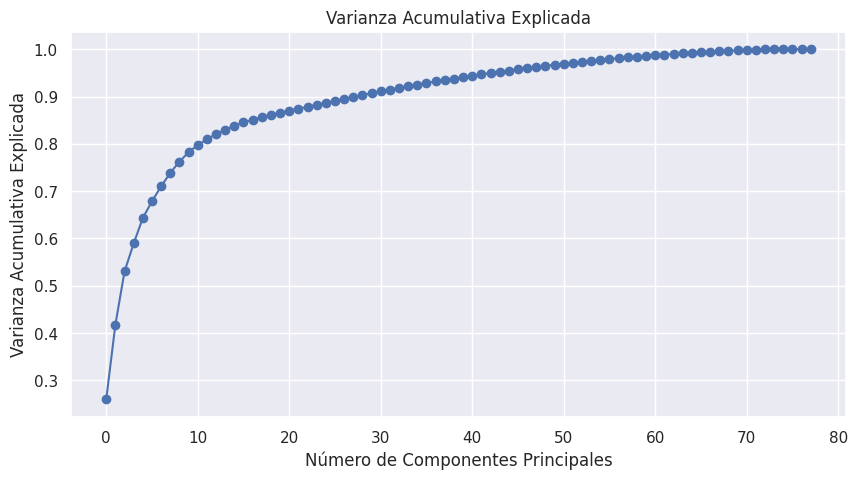

In [24]:
explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)

#Creamos un gráfico de la varianza explicada acumulativa
plt.figure(figsize=(10, 5))
plt.plot(explained_variance_ratio_cumulative, marker='o', linestyle='-', color='b')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulativa Explicada')
plt.title('Varianza Acumulativa Explicada')
plt.grid(True)
plt.show()

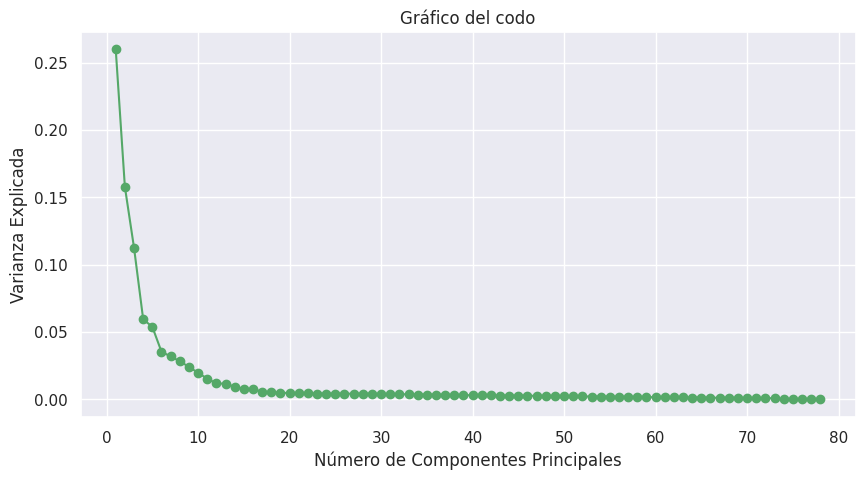

In [25]:
#Creamos el gráfico del codo
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='-', color='g')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada')
plt.title('Gráfico del codo')
plt.grid(True)
plt.show()

In [26]:
#Obtenemos los autovalores de las componentes para analizar el criterio de Kaiser
eigenvalues = pca.explained_variance_

components_to_keep = sum(eigenvalues > 1)

print(f"Número de componentes que cumplen con el criterio de Kaiser: {components_to_keep}")


Número de componentes que cumplen con el criterio de Kaiser: 5


Con las métricas calculadas podemos ver que los principales componentes que explican el fenómeno son entre 5 y 10.

In [70]:
#Creamos un nuevo DataFrame con las componentes principales

n_components = 10
X_pca_top = pca.transform(X_pca)[:, :n_components]

pca_df_top = pd.DataFrame(data=X_pca_top, columns=[f'PC{i+1}' for i in range(n_components)])

df_encoded.reset_index(drop=True, inplace=True)
pca_df_top['RainfallTomorrow'] = df_encoded['RainfallTomorrow']

pca_df_top

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,RainfallTomorrow
0,-0.678572,3.320706,-2.575429,0.911535,0.983397,0.194555,0.199055,-0.017776,0.215527,0.498427,0.512355
1,-0.005751,1.666270,-2.838638,0.201571,0.288918,-0.112731,-0.234558,-1.067644,-0.043574,0.119016,0.594336
2,-0.599509,2.539019,-3.373977,0.312725,0.123971,-0.294792,0.546866,-1.878810,-0.469699,0.705990,2.261292
3,-0.541079,3.860151,-2.242035,0.337581,1.345902,0.096011,0.197374,-1.325699,-0.258527,-0.119119,10.268147
4,0.081920,5.326741,-3.937678,-1.459801,6.808923,4.613903,1.938534,-0.568330,0.726446,-0.167532,-0.088842
...,...,...,...,...,...,...,...,...,...,...,...
15031,-2.690632,-1.421068,0.485115,0.314360,0.024628,-0.316877,-0.161852,-0.623263,1.459934,1.055468,-0.225478
15032,-4.898072,0.165430,-2.120829,0.398144,-0.644291,-0.557814,-0.285516,-0.242132,0.229037,-0.106151,-0.280132
15033,-4.413118,-0.044395,-1.064009,0.111628,-1.061528,0.518885,-0.498299,-0.506733,-0.174390,0.374566,-0.307460
15034,-2.173927,0.112489,1.218757,-0.737846,-0.247382,-0.781706,0.328295,-1.111773,1.106807,0.758281,-0.116169


#División de datos

In [76]:
X = df_encoded.drop(columns=['Date', 'Location', 'RainTomorrow_No', 'RainTomorrow_Yes', 'RainfallTomorrow'])

y = df_encoded['RainfallTomorrow']

In [71]:
"""
X = pca_df_top.drop(columns=['RainfallTomorrow'])

y = pca_df_top['RainfallTomorrow']
"""

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
#Función para MAPE
def mean_absolute_percentage_error(y_true, y_pred, epsilon=1e-10):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

# Regresion Lineal


In [79]:
#Utilizamos el método de regresión lineal y calculamos las métricas
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2_lr = r2_score(y_test, y_pred)
mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test, y_pred)
mape_lr = mean_absolute_percentage_error(y_test, y_pred)

print(f"R2 Score: {r2_lr}")
print(f"MSE: {mse_lr}")
print(f"RMSE: {rmse_lr}")
print(f"MAE: {mae_lr}")
print(f"MAPE: {mape_lr}%")

R2 Score: 0.22887158788219264
MSE: 0.9869699630760532
RMSE: 0.993463619402368
MAE: 0.4537971125025754
MAPE: 188.99869890265828%


# Gradiente Descendiente

In [80]:
##Utilizamos el método de gradiente descendiente y calculamos las métricas
model = SGDRegressor(max_iter=10000, alpha=0.01, learning_rate='constant', eta0=0.01, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2_gd = r2_score(y_test, y_pred)
mse_gd = mean_squared_error(y_test, y_pred)
rmse_gd = np.sqrt(mse_gd)
mae_gd = mean_absolute_error(y_test, y_pred)
mape_gd = mean_absolute_percentage_error(y_test, y_pred)

print(f"R2 Score: {r2_gd}")
print(f"MSE: {mse_gd}")
print(f"RMSE: {rmse_gd}")
print(f"MAE: {mae_gd}")
print(f"MAPE: {mape_gd}%")

R2 Score: -0.30062253544933104
MSE: 1.6646713512511564
RMSE: 1.2902214349681052
MAE: 0.937683948904778
MAPE: 550.5853444944785%


# Metodos de Regularizacion

## Lasso

In [81]:
#Utilizamos el método Lasso y calculamos las métricas
lasso_model = LassoCV()

lasso_model.fit(X_train, y_train)

y_pred_lasso = lasso_model.predict(X_test)

r2_lasso = r2_score(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mape_lasso = mean_absolute_percentage_error(y_test, y_pred_lasso)

print(f"R2 Score: {r2_lasso}")
print(f"MSE: {mse_lasso}")
print(f"RMSE: {rmse_lasso}")
print(f"MAE: {mae_lasso}")
print(f"MAPE: {mape_lasso}%")

R2 Score: 0.22982364360080254
MSE: 0.9857514236179336
RMSE: 0.9928501516432042
MAE: 0.4496893072438923
MAPE: 185.64897564236836%


##Ridge

In [82]:
#Utilizamos el método Ridge y calculamos las métricas

ridge_model = RidgeCV()

ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)

r2_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mape_ridge = mean_absolute_percentage_error(y_test, y_pred_ridge)

print(f"R2 Score: {r2_ridge}")
print(f"MSE: {mse_ridge}")
print(f"RMSE: {rmse_ridge}")
print(f"MAE: {mae_ridge}")
print(f"MAPE: {mape_ridge}%")

R2 Score: 0.22895355563049868
MSE: 0.986865052267104
RMSE: 0.9934108174703474
MAE: 0.4530520619086574
MAPE: 188.53691710293333%


## Elasticnet

In [83]:
#Utilizamos el método ElasticNet y calculamos las métricas
elasticnet_model = ElasticNetCV()

elasticnet_model.fit(X_train, y_train)

y_pred_elasticnet = elasticnet_model.predict(X_test)

r2_elasticnet = r2_score(y_test, y_pred_elasticnet)
mse_elasticnet = mean_squared_error(y_test, y_pred_elasticnet)
rmse_elasticnet = np.sqrt(mse_elasticnet)
mae_elasticnet = mean_absolute_error(y_test, y_pred_elasticnet)
mape_elasticnet = mean_absolute_percentage_error(y_test, y_pred_elasticnet)

print(f"R2 Score: {r2_elasticnet}")
print(f"MSE: {mse_elasticnet}")
print(f"RMSE: {rmse_elasticnet}")
print(f"MAE: {mae_elasticnet}")
print(f"MAPE: {mape_elasticnet}%")

R2 Score: 0.2297182976893375
MSE: 0.9858862562200202
RMSE: 0.9929180511099697
MAE: 0.44942909442553425
MAPE: 185.48434940988955%
